In [9]:
import numpy as np
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

In [10]:
def band(nkl,kpoints,ham):
    '''
    :param k: wave number
    '''
    nk=32
    # Define the position of the original lattice
    #klines=np.zeros((nkl-1,nk))
    n=0
    d=np.size(ham([0.0,0.0]),1)
    evk=np.zeros((nk*nkl-nk-1,d))
    lenk=np.zeros((nk*nkl-nk-1,d))
    for i in range(0,nkl-1):
        #print(i)
        klines=np.linspace(kpoints[i],kpoints[i+1],nk)

        for j in range(0,nk):
            mat=0
            k=klines[j]
            mat=ham(k)
            n=i*nk+j
            evk[n-1]=np.real(np.linalg.eigvalsh(mat))
            lenk[n-1]=n
    plt.plot(evk)
    

# Band structures of selected 2D lattices

## Introduction
In this notebook, we demonstrate the tight-binding approximation calculations of four common 2D lattices - square, triangular, Lieb and honeycomb lattices.  
 


## Square lattice
By analogy with 1D chains, we write the Hamiltonian for the square lattice with equal hopping integrals $t$ to the four nearest neighbor atoms (see the image below):
$$ H(k)=t  \exp(ik_x a)+t  \exp(-ik_x a)+t  \exp(ik_y a)+t  \exp(-ik_y a)$$

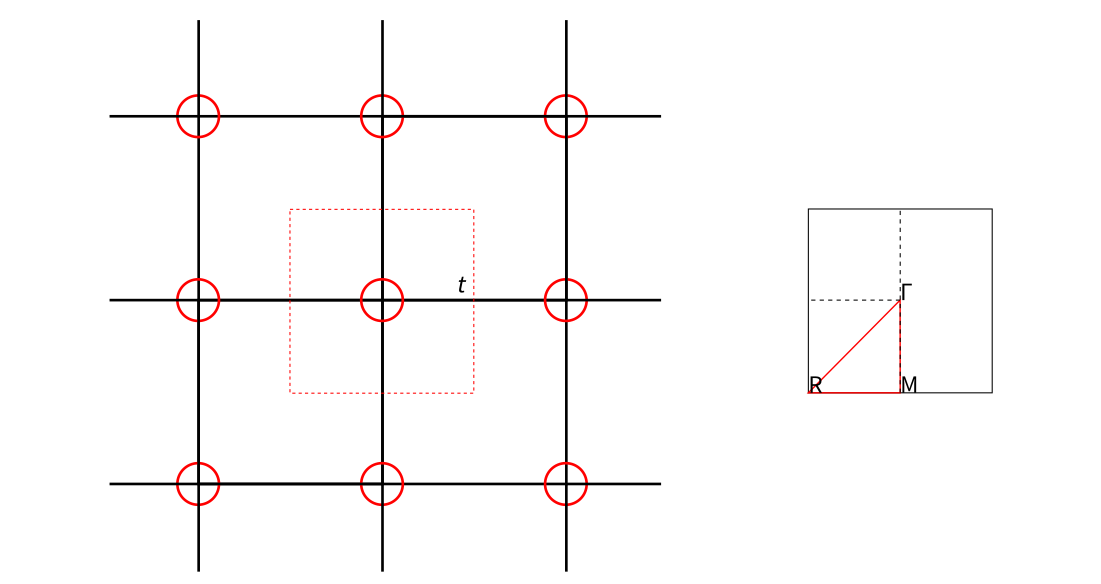

### Analytic solution

It is straighforward to arrive to the analytic solution 
$$E(k)=2t \cos(k_x a)+2t \cos(k_y a)$$

The script below plot the band structure evaluate for the k-point path $\Gamma$-M-R-$\Gamma$ in the first Brillouin which also has square shape.

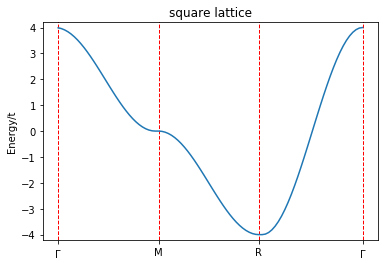

In [11]:
def band_square(t):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.50,0.50]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: square_2d(k,t)
    
    plt.title(u'square lattice')        #
    plt.ylabel('Energy/t')
    #plt.xlabel('')
    plt.xticks([0,31,62,94],
          ['$\Gamma$','M','R','$\Gamma$'])
    plt.ylim(-4.2, 4.2)
    plt.plot([0,0],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([31,31],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([62,62],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([94,94],[-5,5],color='red', linewidth=1.0, linestyle='--')
    
    band(nkl,kpoints,ham1)
def square_2d(kd,t):
    ham=np.zeros((1,1))+0.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][0]=2*t*np.cos(k1)+2*t*np.cos(k2)
    #ham[1][1]=0.0
    return(ham)
band_square(1.0)

## Triangular lattice

Similarly, we can calculate the band structure of triangular lattice in which each site has six nearest neighbors.

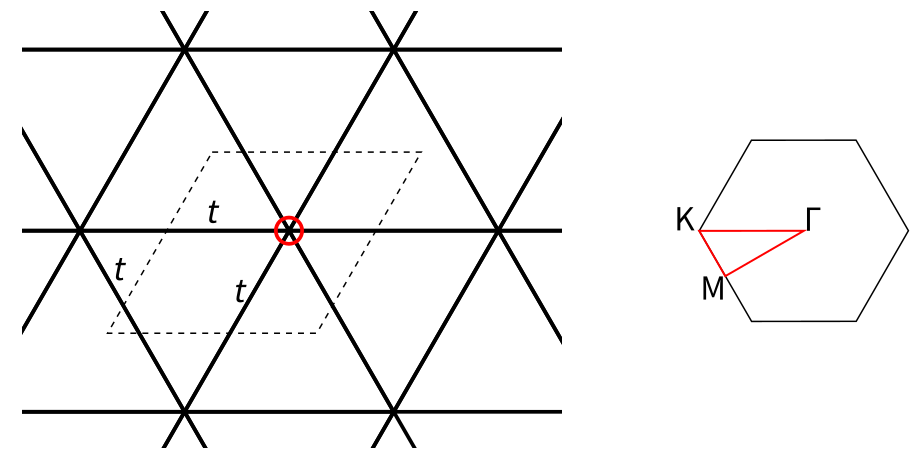

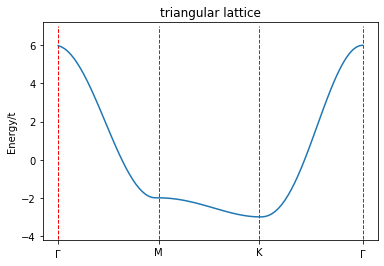

In [12]:
def band_triangular(t):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.33,0.66]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: triangular_2d(k,t)
    
    plt.title(u'triangular lattice')        #设置标题
    plt.ylabel('Energy/t')
    #plt.xlabel('')
    plt.xticks([0,31,62,94],
          ['$\Gamma$','M','K','$\Gamma$'])
    plt.ylim(-4.2, 7.2)
    plt.plot([0,0],[-5,7],color='red', linewidth=1.0, linestyle='--')
    plt.plot([31,31],[-5,7],color='red', linewidth=1.0, linestyle='--')
    plt.plot([62,62],[-5,7],color='red', linewidth=1.0, linestyle='--')
    plt.plot([94,94],[-5,7],color='red', linewidth=1.0, linestyle='--')
    
    band(nkl,kpoints,ham1)
def triangular_2d(kd,t):
    ham=np.zeros((1,1))+1.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][0]=np.exp(k1*1.j)*t+np.exp(k2*1.j)*t+t*np.exp((k1-k2)*1.j)+np.exp(-k1*1.j)*t+np.exp(-k2*1.j)*t+t*np.exp((k2-k1)*1.j)
    #ham[1][1]=0.0
    return(ham)
band_triangular(1.0)

## Honeycomb lattice

The honeycomb lattice is generated by two sublattices A and B. The Hamiltonian matrix is then a $2 \times 2$ matrix:
$$H(k)=\left(\begin{array}{cc}
0 & t( \exp(ik\cdot \delta_1)+\exp(ik\cdot \delta_2)+\exp(ik\cdot \delta_3))\\
t(\exp(-ik\cdot \delta_1)+\exp(-ik\cdot \delta_2)+\exp(-ik\cdot \delta_3)) & 0
\end{array}\right)$$
where $\delta_i$ are vectors connecting nearest-neighbour atoms.

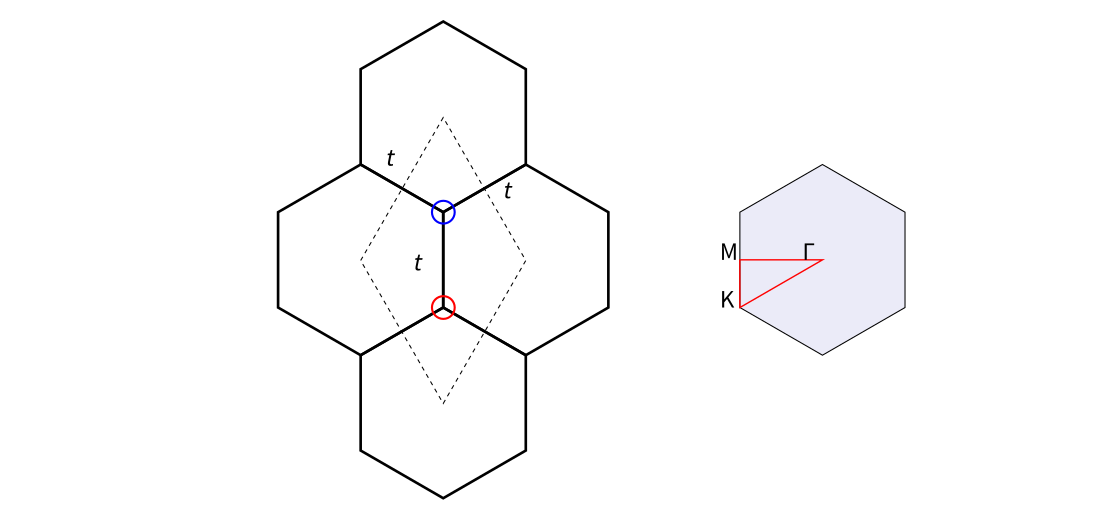   

The eigenvalues of this matrix have the following analytic form:
$$E(k)=\pm \sqrt{3 + 2 \cos(k\cdot\delta_1) + 2 \cos(k\cdot\delta_2) + 2 \cos(k\cdot\delta_3)}$$

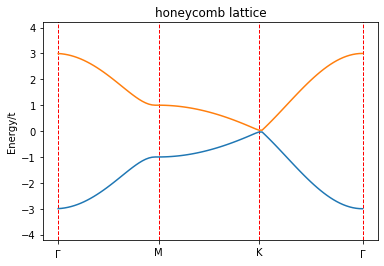

In [13]:
def band_honeycomb(t):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.33,0.66]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: honeycomb_2d(k,t)
    
    plt.title(u'honeycomb lattice')        #设置标题
    plt.ylabel('Energy/t')
    #plt.xlabel('')
    plt.xticks([0,31,62,94],
          ['$\Gamma$','M','K','$\Gamma$'])
    plt.ylim(-4.2, 4.2)
    plt.plot([0,0],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([31,31],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([62,62],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([94,94],[-5,5],color='red', linewidth=1.0, linestyle='--')
    
    band(nkl,kpoints,ham1)
def honeycomb_2d(kd,t):
    ham=np.zeros((2,2))+1.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][1]=np.exp(k1*1.j)*t+np.exp(k2*1.j)*t+t
    ham[1][0]=np.exp(-k1*1.j)*t+np.exp(-k2*1.j)*t+t
    ham[1][1]=0.0
    return(ham)
band_honeycomb(1.0) 

## Lieb lattice
The Lieb lattice is the most complex case as it has 3 atoms per unit cell:  

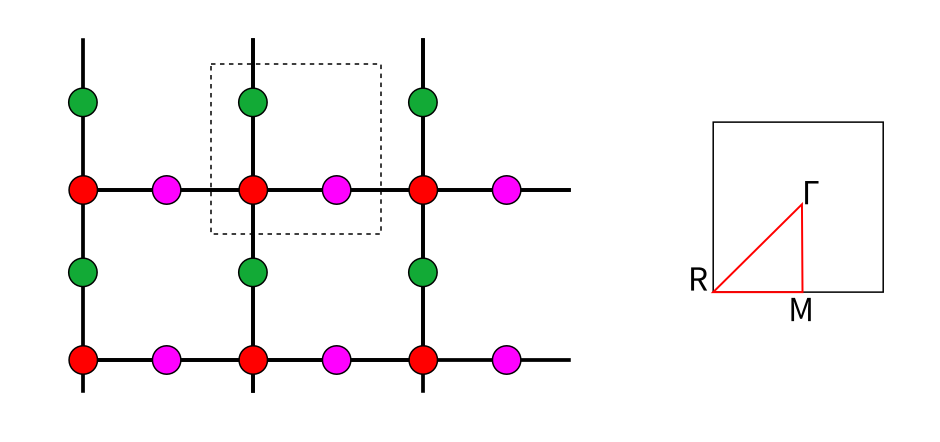

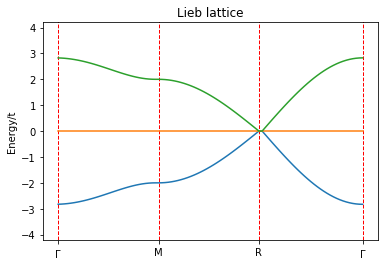

In [14]:
def band_lieb(t):
    nkl=4
    d=2
    kpoints=np.zeros((4,2))
    kpoints[0]=[0.00,0.00]
    kpoints[1]=[0.00,0.50]
    kpoints[2]=[0.50,0.50]
    kpoints[3]=[0.00,0.00]
    ham1 = lambda k: lieb_2d(k,t)
    
    plt.title(u'Lieb lattice')        #
    plt.ylabel('Energy/t')
    #plt.xlabel('')
    plt.xticks([0,31,62,94],
          ['$\Gamma$','M','R','$\Gamma$'])
    plt.ylim(-4.2, 4.2)
    plt.plot([0,0],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([31,31],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([62,62],[-5,5],color='red', linewidth=1.0, linestyle='--')
    plt.plot([94,94],[-5,5],color='red', linewidth=1.0, linestyle='--')
    
    band(nkl,kpoints,ham1)
def lieb_2d(kd,t):
    ham=np.zeros((3,3))+0.j
    k=[0.0,0.0]
    k[0]=kd[0]*2*3.1415926
    k[1]=kd[1]*2*3.1415926
    #print(k)
    k1=k[0]
    k2=k[1]
    ham[0][0]=0.0
    ham[0][1]=t+t*np.exp(-k1*1.j)
    ham[0][2]=t+t*np.exp(-k2*1.j)
    ham[1][0]=t+t*np.exp(k1*1.j)
    ham[1][1]=0.0
    ham[1][2]=0.0
    ham[2][0]=t+t*np.exp(k2*1.j)
    ham[2][1]=0.0
    ham[2][2]=0.0
    return(ham)
band_lieb(1.0)

# Questions

- Modify the code such that you can introduce unequal hopping integrals (e.g. $t_1 \ne t_2$ for the vertical and horizontal bonds in square lattice) and investigate their effect on the band structures.